# 基于KNN的简单分类任务

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

from sklearn.model_selection import GridSearchCV

# 重采样包
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [2]:
df = pd.read_excel("赛题附件\\附件1.xlsx")
df1 = df[['性别','年龄','身高','体重','ASA','有无手术史','有无既往史',
          '是否吸烟','是否酗酒','有无PONV','有无晕动史' , '镇静药名称',
          
          '呛咳', '体动', '术中其他', 

          '是否出现了恶心呕吐的情况是','是否出现了头晕头昏头痛是',
          '有没出现嗜睡乏力的情况呢有', '有没出现腹胀腹痛的情况呢有','还有没其他不舒服的情况呢有']]

# 删除没必要留下的“ASA”
df2 = df1.drop(['ASA'], axis=1)

# 这个特征比例差别太大了，聚合一下
df2["是否吸烟"] = df2["是否吸烟"].map({"从未吸烟者": '不抽烟', 
                                    "经常吸烟者：每天吸卷烟1支以上，连续或累计6个月": '抽烟',
                                    "偶尔吸烟者：每周吸卷烟超过4次，但平均每天不足1支": '抽烟'})

# 题目取特征太无语了，改一下
df2.columns = ['性别','年龄','身高','体重','有无手术史','有无既往史',
            '是否吸烟','是否酗酒','有无PONV','有无晕动史','镇静药名称',
            '呛咳', '体动', '术中其他',
            '是否恶心呕吐','是否头晕头昏头痛',
            '是否嗜睡乏力','是否腹胀腹痛','有无其他不舒服']

## 数据清洗

In [3]:
df2['是否恶心呕吐'].fillna('否', inplace=True)
df2['是否头晕头昏头痛'].fillna('否', inplace=True)
df2['是否嗜睡乏力'].fillna('否', inplace=True)
df2['是否腹胀腹痛'].fillna('否', inplace=True)
df2['有无其他不舒服'].fillna('否', inplace=True)

# 数值特征用均值填补缺失值
df2['年龄'].fillna(df1['年龄'].mean(), inplace=True)

## 数据可视化

<Axes: xlabel='有无其他不舒服', ylabel='count'>

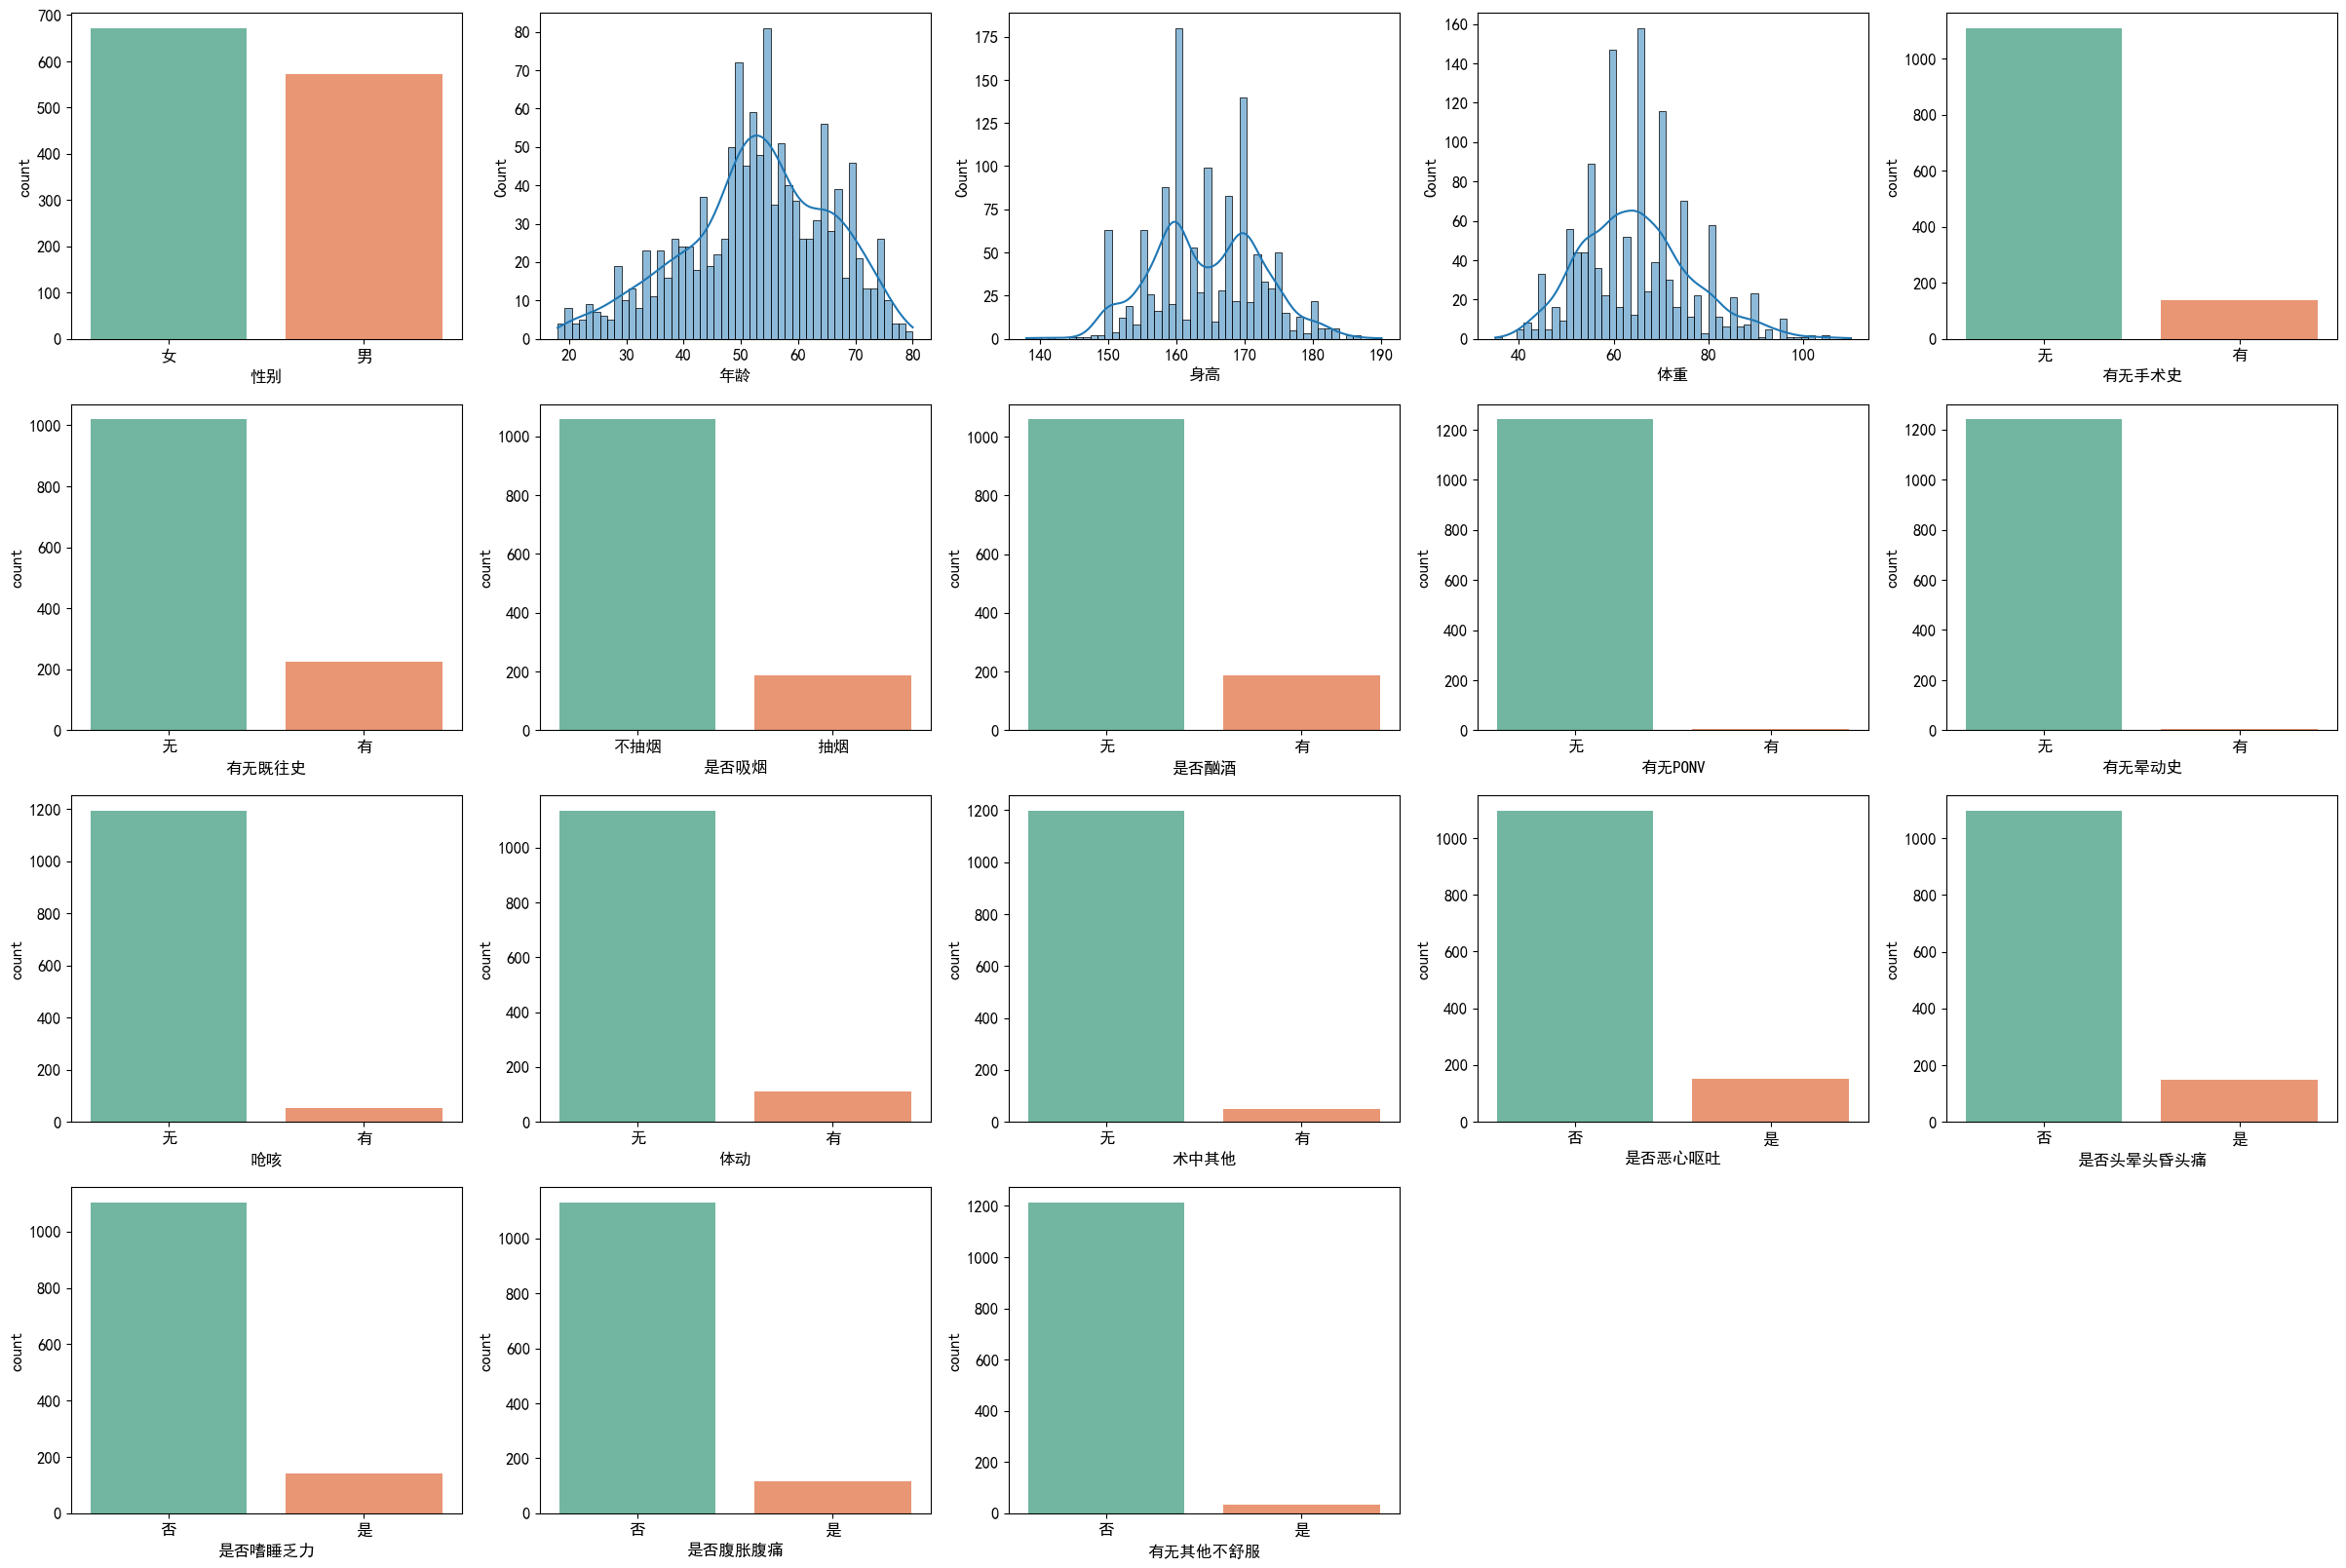

In [4]:
plt.figure(figsize=(30, 20))

plt.subplot(4, 5, 1)
sns.countplot(x='性别', palette='Set2', data = df2)
plt.subplot(4, 5, 2)
sns.histplot(df2['年龄'], kde=True, bins=50)
plt.subplot(4, 5, 3)
sns.histplot(df2['身高'], kde=True, bins=50)
plt.subplot(4, 5, 4)
sns.histplot(df2['体重'], kde=True, bins=50)
plt.subplot(4, 5, 5)
sns.countplot(x='有无手术史', palette='Set2', data = df2)
plt.subplot(4, 5, 6)
sns.countplot(x='有无既往史', palette='Set2', data = df2)
plt.subplot(4, 5, 7)
sns.countplot(x='是否吸烟', palette='Set2', data = df2)
plt.subplot(4, 5, 8)
sns.countplot(x='是否酗酒', palette='Set2', data = df2)
plt.subplot(4, 5, 9)
sns.countplot(x='有无PONV', palette='Set2', data = df2)
plt.subplot(4, 5, 10)
sns.countplot(x='有无晕动史', palette='Set2', data = df2)
plt.subplot(4, 5, 11)
sns.countplot(x='呛咳', palette='Set2', data = df2)
plt.subplot(4, 5, 12)
sns.countplot(x='体动', palette='Set2', data = df2)
plt.subplot(4, 5, 13)
sns.countplot(x='术中其他', palette='Set2', data = df2)
plt.subplot(4, 5, 14)
sns.countplot(x='是否恶心呕吐', palette='Set2', data = df2)
plt.subplot(4, 5, 15)
sns.countplot(x='是否头晕头昏头痛', palette='Set2', data = df2)
plt.subplot(4, 5, 16)
sns.countplot(x='是否嗜睡乏力', palette='Set2', data = df2)
plt.subplot(4, 5, 17)
sns.countplot(x='是否腹胀腹痛', palette='Set2', data = df2)
plt.subplot(4, 5, 18)
sns.countplot(x='有无其他不舒服', palette='Set2', data = df2)


Text(0.5, 1.0, '病人有无其他不舒服')

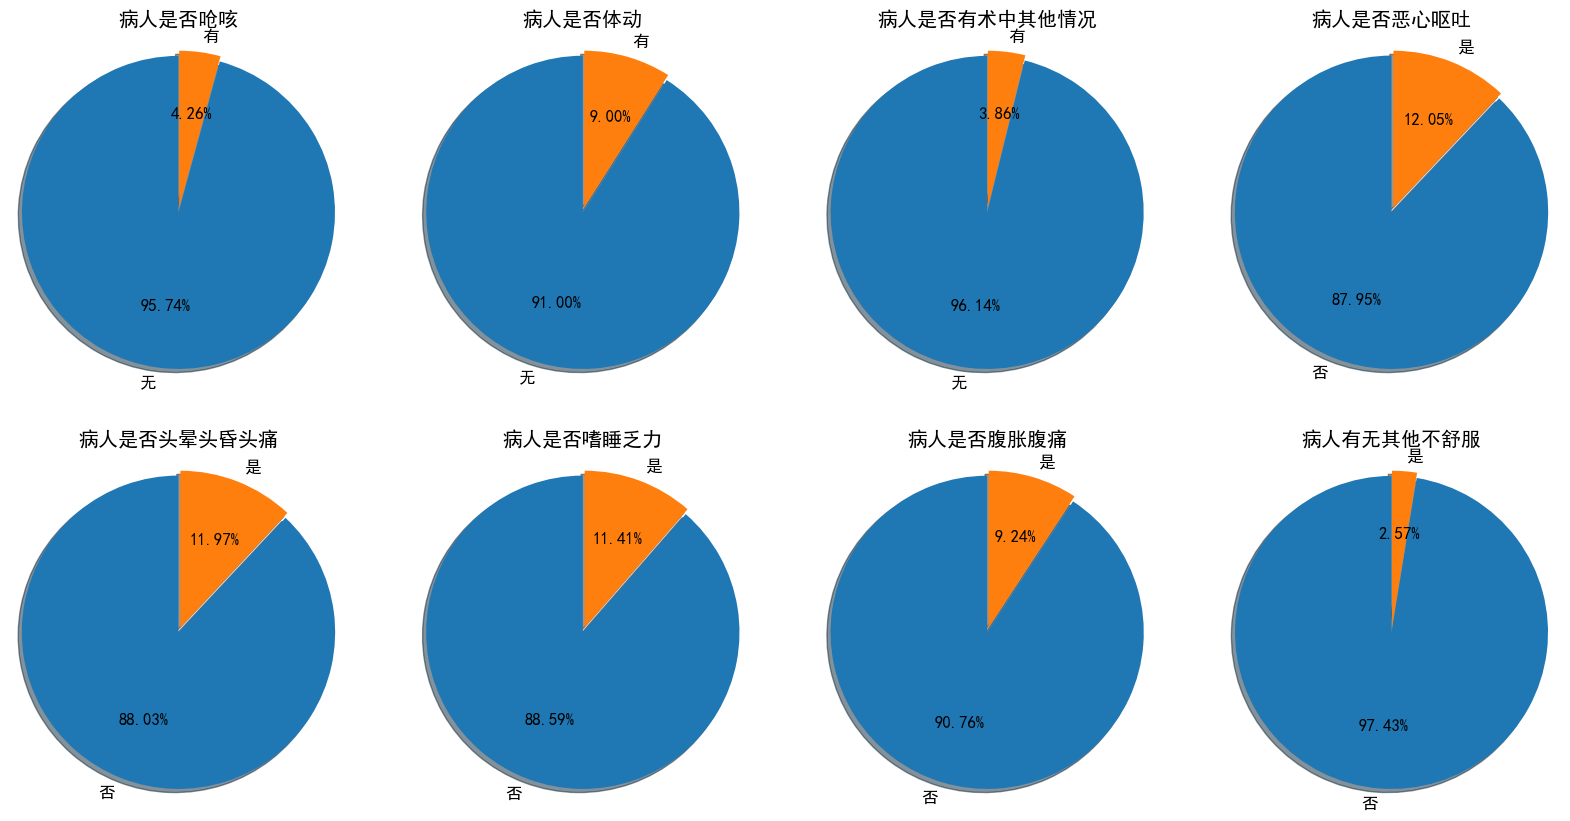

In [5]:
def pie_paint2(df, label):

    x = np.array(df[label].value_counts().reset_index())
    # 这个要改成类别对应的数字
    explode = (0.04, 0)
    plt.axis('equal') 
    plt.pie(x[:, 1], labels=x[:, 0], autopct="%1.2f%%", explode=explode, shadow=True, startangle=90,radius=1.2)
    my_circle = plt.Circle((0,0), 0.7, color='white')
    plt.axis('equal')

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
pie_paint2(df2, "呛咳")
plt.title("病人是否呛咳")
plt.subplot(2, 4, 2)
pie_paint2(df2, "体动")
plt.title("病人是否体动")
plt.subplot(2, 4, 3)
pie_paint2(df2, "术中其他")
plt.title("病人是否有术中其他情况")
plt.subplot(2, 4, 4)
pie_paint2(df2, "是否恶心呕吐")
plt.title("病人是否恶心呕吐")
plt.subplot(2, 4, 5)
pie_paint2(df2, "是否头晕头昏头痛")
plt.title("病人是否头晕头昏头痛")
plt.subplot(2, 4, 6)
pie_paint2(df2, "是否嗜睡乏力")
plt.title("病人是否嗜睡乏力")
plt.subplot(2, 4, 7)
pie_paint2(df2, "是否腹胀腹痛")
plt.title("病人是否腹胀腹痛")
plt.subplot(2, 4, 8)
pie_paint2(df2, "有无其他不舒服")
plt.title("病人有无其他不舒服")

<br><br><br>

In [6]:
# df2.to_excel('探索信息\\第一题预测使用的数据.xlsx')

## 模型准备

In [7]:
# 特征空间:独热编码
X = pd.get_dummies(df2[['性别','年龄','身高','体重','有无手术史','有无既往史',
          '是否吸烟','是否酗酒','镇静药名称']])

# 数据归一化
model = MinMaxScaler()
X[['年龄','身高','体重']] = model.fit_transform(df2[['年龄','身高','体重']])

# 字符串换成数字
df2["呛咳"] = df2["呛咳"].map({"有": 1, "无": 0})
df2["体动"] = df2["体动"].map({"有": 1, "无": 0})
df2["术中其他"] = df2["术中其他"].map({"有": 1, "无": 0})
df2["是否恶心呕吐"] = df2["是否恶心呕吐"].map({"是": 1, "否": 0})
df2["是否头晕头昏头痛"] = df2["是否头晕头昏头痛"].map({"是": 1, "否": 0})
df2["是否嗜睡乏力"] = df2["是否嗜睡乏力"].map({"是": 1, "否": 0})
df2["是否腹胀腹痛"] = df2["是否腹胀腹痛"].map({"是": 1, "否": 0})
df2["有无其他不舒服"] = df2["有无其他不舒服"].map({"是": 1, "否": 0})

In [8]:
'''

# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.呛咳)

# 定义参数搜索空间
param_grid = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(10, 51, 10),
    'p': [1, 2, 3]
}

# 初始化KNN模型
knn = KNeighborsClassifier()

# 使用网格搜索进行调参
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

# 输出最佳参数和最佳得分
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

'''

'\n\n# 创建上采样对象\nros = RandomOverSampler(random_state=42)\n# 对数据进行上采样\nX_resampled, y_resampled = ros.fit_resample(X, df2.呛咳)\n\n# 定义参数搜索空间\nparam_grid = {\n    \'n_neighbors\': np.arange(1, 11),\n    \'weights\': [\'uniform\', \'distance\'],\n    \'algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\'],\n    \'leaf_size\': np.arange(10, 51, 10),\n    \'p\': [1, 2, 3]\n}\n\n# 初始化KNN模型\nknn = KNeighborsClassifier()\n\n# 使用网格搜索进行调参\ngrid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)\ngrid_search.fit(X_resampled, y_resampled)\n\n# 输出最佳参数和最佳得分\nprint("Best parameters: {}".format(grid_search.best_params_))\nprint("Best cross-validation score: {:.2f}".format(grid_search.best_score_))\n\n'

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
Best cross-validation score: 0.97

## 呛咳

In [9]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.呛咳)

# 划分数据集
X1_train, X1_test, y1_train, y1_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y1_pred = Model.fit(X1_train, y1_train).predict(X1_test)

## 体动

In [10]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.体动)

# 划分数据集
X2_train, X2_test, y2_train, y2_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y2_pred = Model.fit(X2_train, y2_train).predict(X2_test)

## 术中其他情况

In [11]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.术中其他)

# 划分数据集
X3_train, X3_test, y3_train, y3_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y3_pred = Model.fit(X3_train, y3_train).predict(X3_test)

## 是否恶心呕吐

In [12]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.是否恶心呕吐)

# 划分数据集
X4_train, X4_test, y4_train, y4_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y4_pred = Model.fit(X4_train, y4_train).predict(X4_test)

## 是否头晕头昏头痛

In [13]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.是否头晕头昏头痛)

# 划分数据集
X5_train, X5_test, y5_train, y5_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y5_pred = Model.fit(X5_train, y5_train).predict(X5_test)

## 是否嗜睡乏力

In [14]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.是否嗜睡乏力)

# 划分数据集
X6_train, X6_test, y6_train, y6_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y6_pred = Model.fit(X6_train, y6_train).predict(X6_test)

## 是否腹胀腹痛

In [15]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.是否腹胀腹痛)

# 划分数据集
X7_train, X7_test, y7_train, y7_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y7_pred = Model.fit(X7_train, y7_train).predict(X7_test)

## 有无其他不舒服

In [16]:
# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, df2.有无其他不舒服)

# 划分数据集
X8_train, X8_test, y8_train, y8_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Model = KNeighborsClassifier(algorithm='auto', leaf_size=10, 
                            n_neighbors=1, p=3, weights='uniform')
y8_pred = Model.fit(X8_train, y8_train).predict(X8_test)

# 模型评价

## 这个做成三线表

In [17]:
print("评估数据结果打印:\n", classification_report(y1_test, y1_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       247
           1       0.93      1.00      0.96       230

    accuracy                           0.96       477
   macro avg       0.97      0.97      0.96       477
weighted avg       0.97      0.96      0.96       477



In [18]:
print("评估数据结果打印:\n", classification_report(y2_test, y2_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       235
           1       0.86      1.00      0.93       219

    accuracy                           0.92       454
   macro avg       0.93      0.93      0.92       454
weighted avg       0.93      0.92      0.92       454



In [19]:
print("评估数据结果打印:\n", classification_report(y3_test, y3_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       250
           1       0.95      1.00      0.98       229

    accuracy                           0.98       479
   macro avg       0.98      0.98      0.98       479
weighted avg       0.98      0.98      0.98       479



In [20]:
print("评估数据结果打印:\n", classification_report(y4_test, y4_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       228
           1       0.88      0.98      0.93       210

    accuracy                           0.93       438
   macro avg       0.93      0.93      0.93       438
weighted avg       0.93      0.93      0.93       438



In [21]:
print("评估数据结果打印:\n", classification_report(y5_test, y5_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       232
           1       0.86      0.99      0.92       207

    accuracy                           0.92       439
   macro avg       0.92      0.92      0.92       439
weighted avg       0.93      0.92      0.92       439



In [22]:
print("评估数据结果打印:\n", classification_report(y6_test, y6_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       221
           1       0.88      1.00      0.94       221

    accuracy                           0.93       442
   macro avg       0.94      0.93      0.93       442
weighted avg       0.94      0.93      0.93       442



In [23]:
print("评估数据结果打印:\n", classification_report(y7_test, y7_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       224
           1       0.93      1.00      0.96       228

    accuracy                           0.96       452
   macro avg       0.97      0.96      0.96       452
weighted avg       0.96      0.96      0.96       452



In [24]:
print("评估数据结果打印:\n", classification_report(y8_test, y8_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       245
           1       0.97      1.00      0.99       241

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



## 这个放在文章里

In [25]:
# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat1 = confusion_matrix(y1_test, y1_pred, 
                labels=[1, 0])
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred)
auc1 = roc_auc_score(y1_test, y1_pred)

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat2 = confusion_matrix(y2_test, y2_pred, 
                labels=[1, 0])
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_pred)
auc2 = roc_auc_score(y2_test, y2_pred)

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat3 = confusion_matrix(y3_test, y3_pred, 
                labels=[1, 0])
fpr3, tpr3, thresholds3 = roc_curve(y3_test, y3_pred)
auc3 = roc_auc_score(y3_test, y3_pred)

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat4 = confusion_matrix(y4_test, y4_pred, 
                labels=[1, 0])
fpr4, tpr4, thresholds4 = roc_curve(y4_test, y4_pred)
auc4 = roc_auc_score(y4_test, y4_pred)

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat5 = confusion_matrix(y5_test, y5_pred, 
                labels=[1, 0])
fpr5, tpr5, thresholds5 = roc_curve(y5_test, y5_pred)
auc5 = roc_auc_score(y5_test, y5_pred)

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat6 = confusion_matrix(y6_test, y6_pred, 
                labels=[1, 0])
fpr6, tpr6, thresholds6 = roc_curve(y6_test, y6_pred)
auc6 = roc_auc_score(y6_test, y6_pred)

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat7 = confusion_matrix(y7_test, y7_pred, 
                labels=[1, 0])
fpr7, tpr7, thresholds7 = roc_curve(y7_test, y7_pred)
auc7 = roc_auc_score(y7_test, y7_pred)

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat8 = confusion_matrix(y8_test, y8_pred, 
                labels=[1, 0])
fpr8, tpr8, thresholds8 = roc_curve(y8_test, y8_pred)
auc8 = roc_auc_score(y8_test, y8_pred)

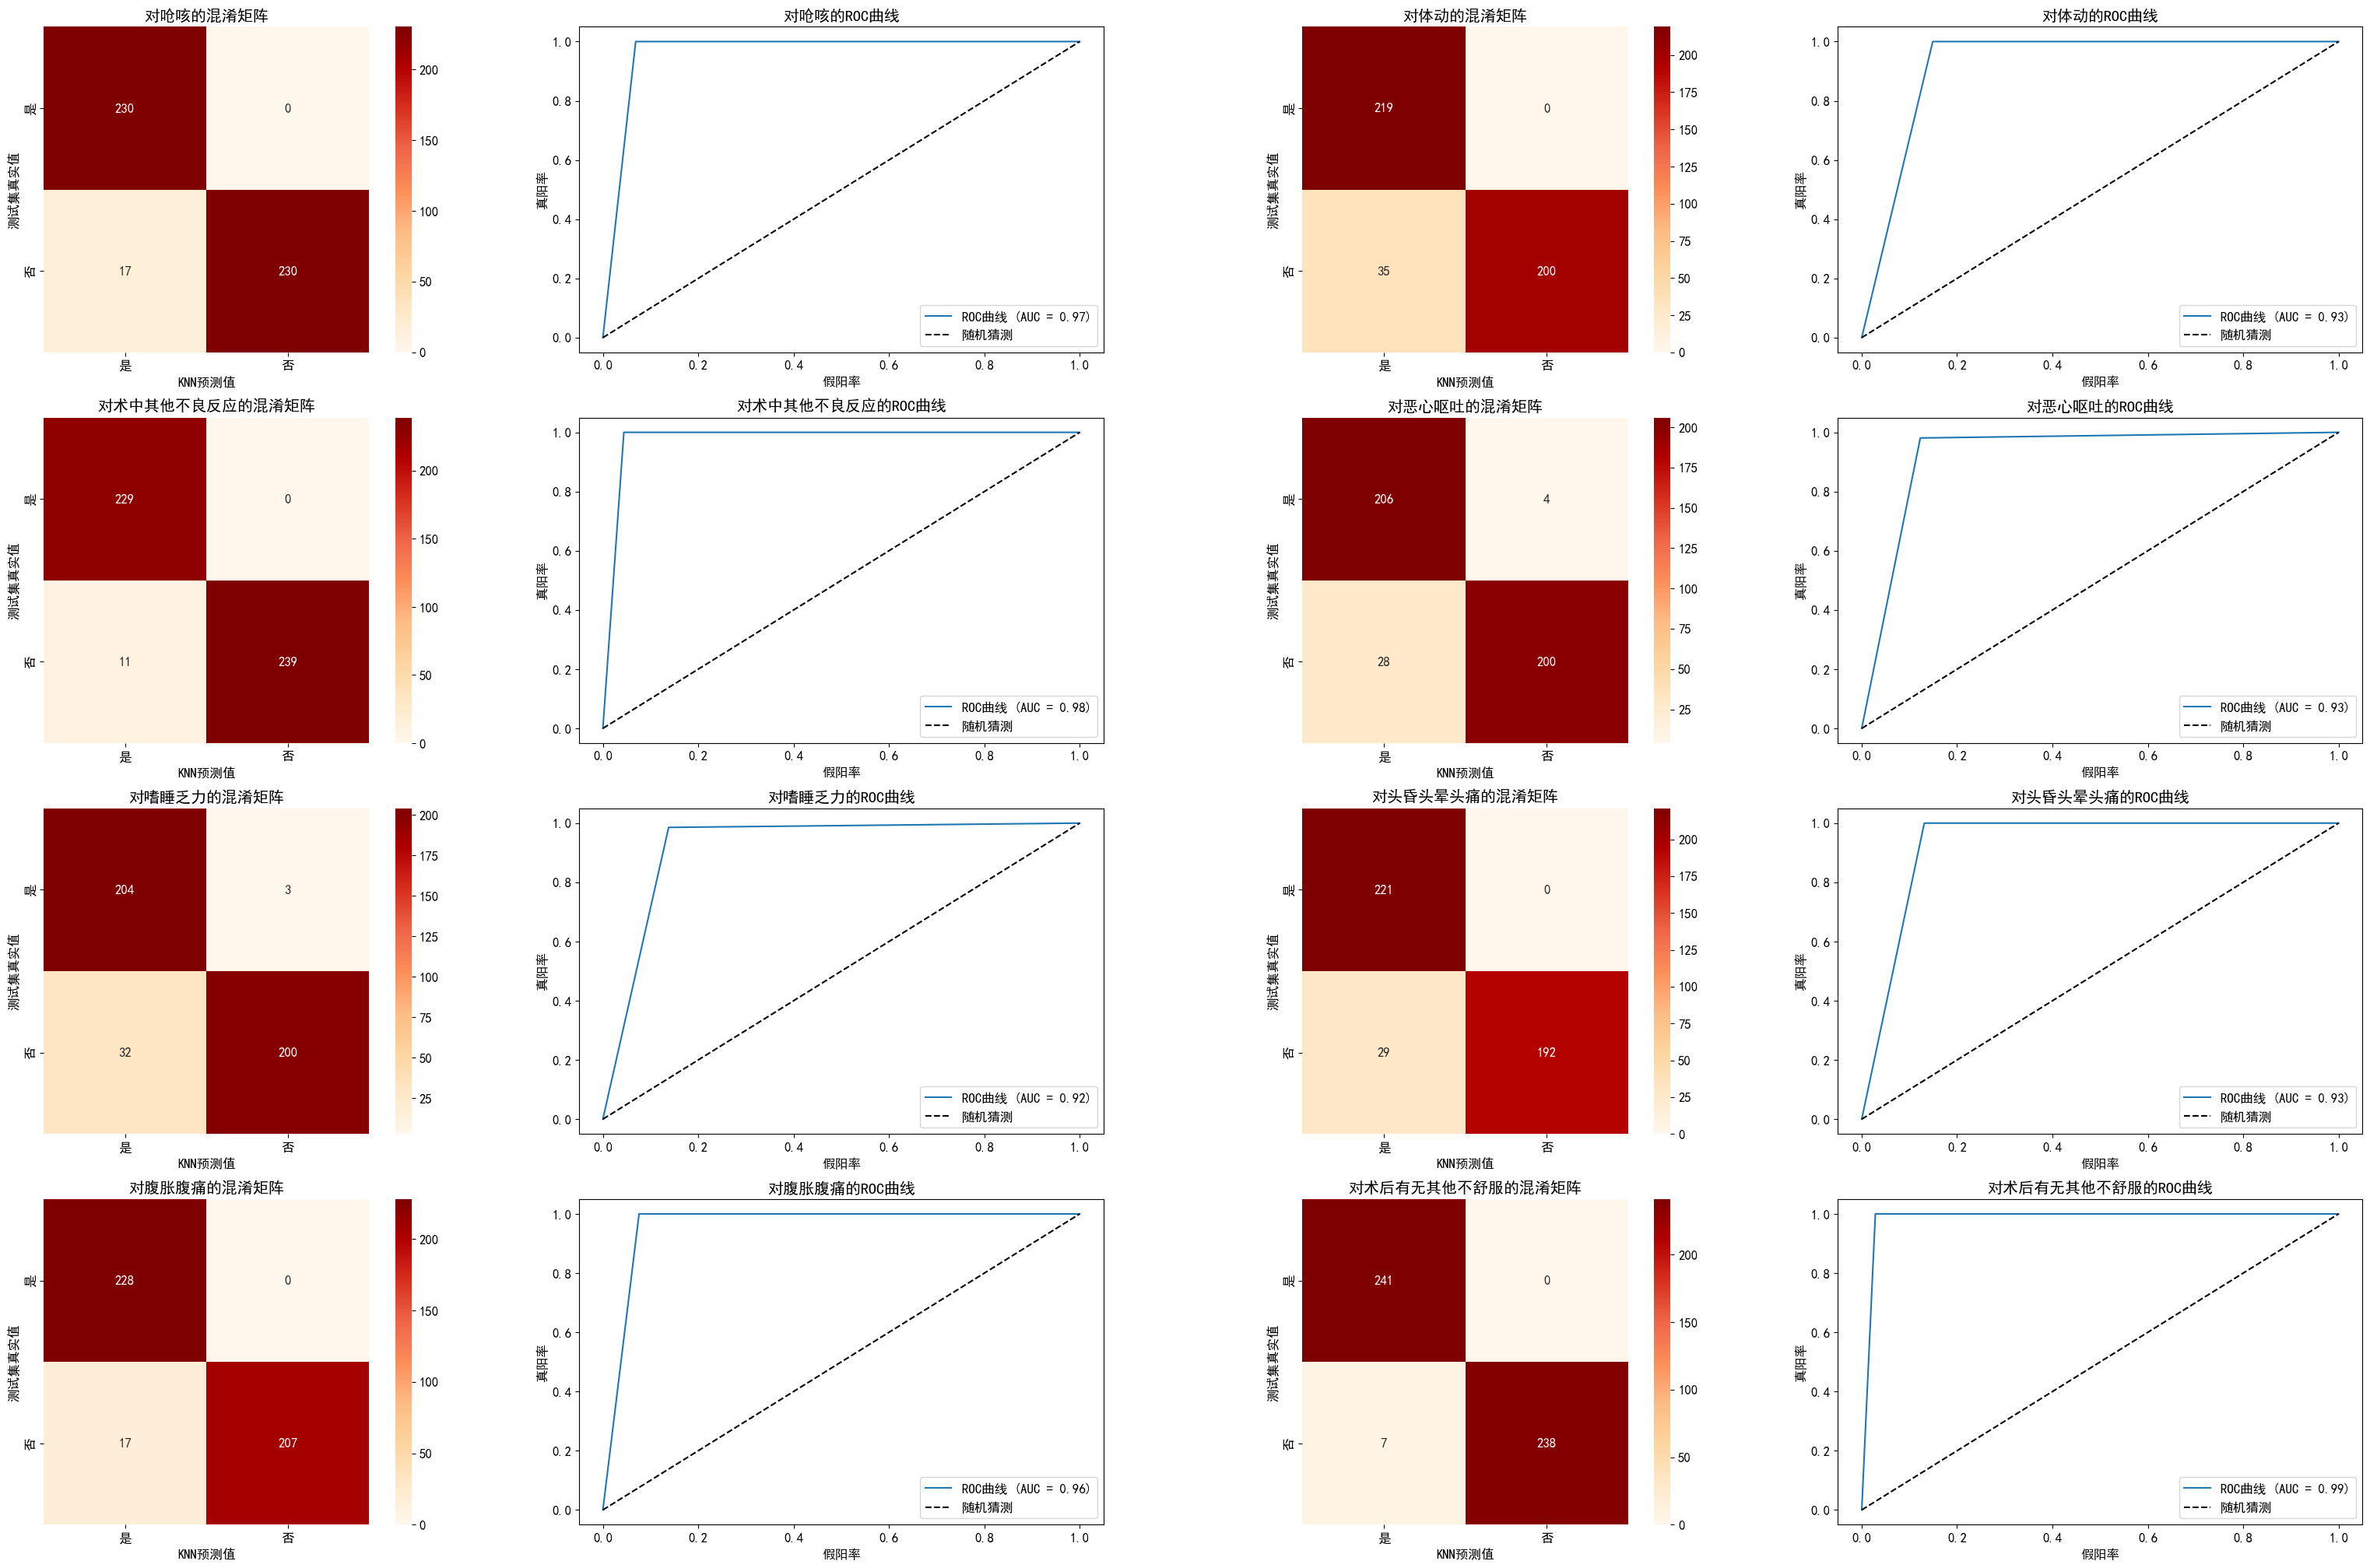

In [29]:
plt.figure(figsize=(40, 25))

# 形成热力图
plt.subplot(4, 4, 1)
sns.heatmap(mat1, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对呛咳的混淆矩阵")

plt.subplot(4, 4, 2)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr1, tpr1, label='ROC曲线 (AUC = {:.2f})'.format(auc1))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对呛咳的ROC曲线')
plt.legend()


# 形成热力图
plt.subplot(4, 4, 3)
sns.heatmap(mat2, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对体动的混淆矩阵")

plt.subplot(4, 4, 4)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr2, tpr2, label='ROC曲线 (AUC = {:.2f})'.format(auc2))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对体动的ROC曲线')
plt.legend()


# 形成热力图
plt.subplot(4, 4, 5)
sns.heatmap(mat3, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对术中其他不良反应的混淆矩阵")

plt.subplot(4, 4, 6)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr3, tpr3, label='ROC曲线 (AUC = {:.2f})'.format(auc3))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对术中其他不良反应的ROC曲线')
plt.legend()



# 形成热力图
plt.subplot(4, 4, 7)
sns.heatmap(mat4, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对恶心呕吐的混淆矩阵")

plt.subplot(4, 4, 8)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr4, tpr4, label='ROC曲线 (AUC = {:.2f})'.format(auc4))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对恶心呕吐的ROC曲线')
plt.legend()




# 形成热力图
plt.subplot(4, 4, 9)
sns.heatmap(mat5, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对嗜睡乏力的混淆矩阵")

plt.subplot(4, 4, 10)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr5, tpr5, label='ROC曲线 (AUC = {:.2f})'.format(auc5))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对嗜睡乏力的ROC曲线')
plt.legend()


# 形成热力图
plt.subplot(4, 4, 11)
sns.heatmap(mat6, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对头昏头晕头痛的混淆矩阵")

plt.subplot(4, 4, 12)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr6, tpr6, label='ROC曲线 (AUC = {:.2f})'.format(auc6))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对头昏头晕头痛的ROC曲线')
plt.legend()

# 形成热力图
plt.subplot(4, 4, 13)
sns.heatmap(mat7, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对腹胀腹痛的混淆矩阵")

plt.subplot(4, 4, 14)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr7, tpr7, label='ROC曲线 (AUC = {:.2f})'.format(auc7))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对腹胀腹痛的ROC曲线')
plt.legend()

# 形成热力图
plt.subplot(4, 4, 15)
sns.heatmap(mat8, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["是", "否"], 
    yticklabels=["是", "否"])
plt.xlabel("KNN预测值")
plt.ylabel("测试集真实值")
plt.title("对术后有无其他不舒服的混淆矩阵")

plt.subplot(4, 4, 16)
# 绘制ROC曲线和y=x的对角线
plt.plot(fpr8, tpr8, label='ROC曲线 (AUC = {:.2f})'.format(auc8))
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测')
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('对术后有无其他不舒服的ROC曲线')
plt.legend()

plt.show()